# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [27]:
import numpy as np
import pandas as pd
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [28]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [29]:
df.YEAR.nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [30]:
print(df[df["STATE"] == "MICHIGAN"].AVG_MATH_8_SCORE.mean())
print(df[df["STATE"] == "OHIO"].AVG_MATH_8_SCORE.mean())

276.1666666666667
282.25


Find the average for your chosen test across all states in 2019

In [31]:
df.groupby("STATE").AVG_MATH_8_SCORE.mean()

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

For each state, find a maximum value for your chosen test score

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [33]:
df.groupby("STATE").AVG_MATH_8_SCORE.max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [34]:
df["EXPENDITURE_PERCENT"] = df["TOTAL_EXPENDITURE"] / df["TOTAL_REVENUE"]
df.groupby("STATE")["EXPENDITURE_PERCENT"].mean()

STATE
ALABAMA                 1.024497
ALASKA                  1.057837
ARIZONA                 1.001807
ARKANSAS                1.023164
CALIFORNIA              1.006692
COLORADO                1.035924
CONNECTICUT             0.963621
DELAWARE                1.010051
DISTRICT_OF_COLUMBIA    0.998779
DODEA                        NaN
FLORIDA                 1.016221
GEORGIA                 0.992391
HAWAII                  0.906473
IDAHO                   0.994093
ILLINOIS                1.009005
INDIANA                 0.969182
IOWA                    1.014014
KANSAS                  0.986681
KENTUCKY                1.008460
LOUISIANA               0.989603
MAINE                   0.992992
MARYLAND                0.991966
MASSACHUSETTS           0.991420
MICHIGAN                1.010614
MINNESOTA               1.044186
MISSISSIPPI             1.008017
MISSOURI                1.011247
MONTANA                 0.994268
NATIONAL                     NaN
NEBRASKA                0.989121
NEVA

In [35]:
df["EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]
df.groupby("STATE")["EXPENDITURE_PER_STUDENT"].mean()

STATE
ALABAMA                  7.882837
ALASKA                  14.170685
ARIZONA                  7.499457
ARKANSAS                 8.225769
CALIFORNIA               9.492956
COLORADO                 8.832212
CONNECTICUT             13.992111
DELAWARE                12.230080
DISTRICT_OF_COLUMBIA    18.212654
DODEA                         NaN
FLORIDA                  8.581060
GEORGIA                  8.836982
HAWAII                   9.867800
IDAHO                    6.505544
ILLINOIS                10.732388
INDIANA                  9.547275
IOWA                     9.752215
KANSAS                   9.110558
KENTUCKY                 8.303635
LOUISIANA                8.704111
MAINE                   11.004162
MARYLAND                11.523504
MASSACHUSETTS           12.869153
MICHIGAN                10.942132
MINNESOTA               11.083583
MISSISSIPPI              7.041915
MISSOURI                 8.893105
MONTANA                  8.880870
NATIONAL                      NaN
NEBRASKA

Feature engineering justification: **Would be interesting to see how revenue compares to the expenditure for each state, and if that correlates at all to educational outcome. **

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

In [36]:
import matplotlib.pyplot as plt


In [46]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

In [47]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

Text(0.5, 1.0, '8th Grade Math Score Over Time')

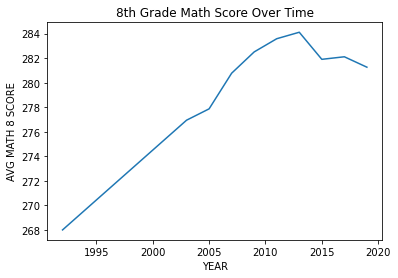

In [49]:

df.groupby("YEAR")["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('AVG MATH 8 SCORE')
plt.title('8th Grade Math Score Over Time')

**Math score has increased over time, although from 2013 onwards, score has been generally decreasing.**

**Visualization 2**

Text(0.5, 1.0, '8th Grade Math Score vs. Per Student Expenditure')

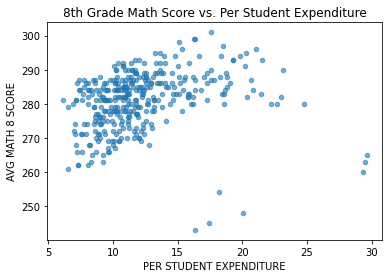

In [51]:
# df.groupby("EXPENDITURE_PER_STUDENT")["AVG_MATH_8_SCORE"].mean().plot()

df.plot.scatter(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('PER STUDENT EXPENDITURE')
plt.ylabel('AVG MATH 8 SCORE')
plt.title('8th Grade Math Score vs. Per Student Expenditure')

**Math scores tend to increase with an increase in per student expenditure, although there are a few outliers. The data seems to fall on a strong general trend, though.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [53]:
from sklearn.model_selection import train_test_split

In [62]:
df.dropna(subset='EXPENDITURE_PER_STUDENT', inplace=True)
X = df[['YEAR','EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [56]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [57]:
# create your model here
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [66]:
model.score(X_test, y_test)

0.8412291291532947

In [67]:
np.mean(model.predict(X_test)-y_test)

0.33773819875216543

In [68]:
np.mean(np.abs(model.predict(X_test)-y_test))

2.3745640048533017

In [69]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.9159537977069636

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

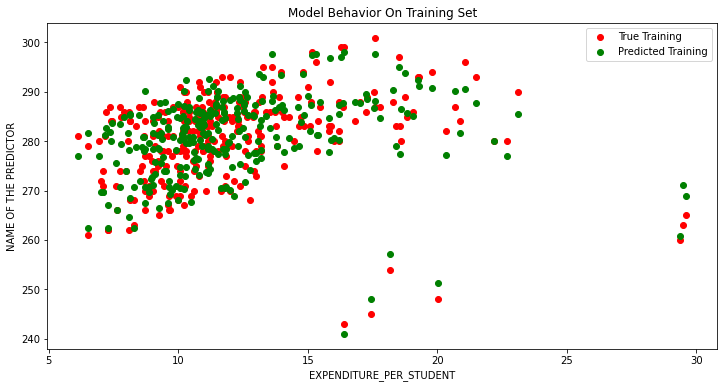

In [75]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

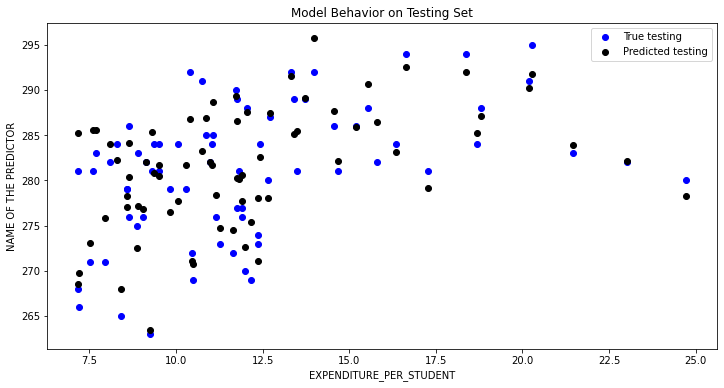

In [76]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")